<a href="https://colab.research.google.com/github/matchbou/kaggle-study-20190410/blob/master/Machine%20Learning%20Algorithms%20vs%20Time%20SeriesAnalysis-201904121633.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://www.kaggle.com/ladylittlebee/machine-learning-algorithms-vs-time-seriesanalysis



#Machine Learning Algorithms vs Time SeriesAnalysis

In [0]:
# Hi everyone, before diving right into the project, 
# I want to share some important facts about avocado production and consumption;

# Mexico supplies 37% of the international avocado market.(FAOSTAT. Retrieved 2018-08-23)

# Of the 57 avocado producing countries, the other major producers are Dominican Republic, Peru, Colombia, and Indonesia in that order. (Statista)

# USA is placed at 10th in this list, with 2.4% of the world total production.(FAOSTAT. Retrieved 2018-08-23)

# Most of the avocados in the United States come from California (followed by Florida and Hawaii) or Mexico. (NASS)

# The value of USA avocado production measured $392 million in 2017. The United States produced 146,310 tons. (NASS, 2018)

# The United States is a net importer of avocados from Mexico. Mexico supplied most of the avocados imported into the United States in 2017. 

# In 2017, the United States imported $2.6 billion in fresh avocados and exported approximately $28,500 (ERS 2018).

# After having a quick info session, now let's start to coding! Hope you enjoy it :)

In [0]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

In [4]:
# Update necessary packages first
!pip3 uninstall --yes fbprophet
!pip3 install fbprophet --no-cache-dir --no-binary :all:
!pip3 install pydotplus --no-cache-dir --no-binary :all:


Uninstalling fbprophet-0.4.post2:
  Successfully uninstalled fbprophet-0.4.post2
    100% |████████████████████████████████| 51kB 2.7MB/s 
y
  Running setup.py install for fbprophet ... done


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matchbou","key":"0bb292e80b8f97a13913b333aa348a4a"}'}

In [6]:
!pip install kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# kaggleデータ置き場とjupyernoteのカレントディレクトリフォルダを作成

!mkdir ./input
!mkdir ./notebook

In [0]:
#osライブラリ読込してinputに移動⇒kaggleデータもダウンロード　⇒ notebookフォルダに移動
import os
os.chdir('input')



In [11]:
#dowload datasets

!kaggle datasets download -d neuromusic/avocado-prices

  0% 0.00/629k [00:00<?, ?B/s]
100% 629k/629k [00:00<00:00, 40.5MB/s]


In [12]:
!pwd
!ls -a

/content/input
.  ..  avocado-prices.zip


In [13]:
!unzip avocado-prices.zip -d ./

Archive:  avocado-prices.zip
  inflating: ./avocado.csv           


In [0]:
os.chdir('../notebook')

In [15]:
#上記操作の結果以下のディレクトリ配置となる

# /content/notebook このipynbのカレントディレクトリ
# /content/input カグルからダウンロードしたcsvファイルの置き場所

!pwd
!ls -a ../input


/content/notebook
.  ..  avocado.csv  avocado-prices.zip


In [16]:
print(os.listdir('../input'))

['avocado.csv', 'avocado-prices.zip']


In [0]:
#ここからカーネルの内容に踏み込む

In [0]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

In [0]:
# downloading and describing the dataset

df = pd.read_csv('../input/avocado.csv')


In [20]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [21]:
df.shape

(18249, 14)

In [0]:
# Some relevant columns in the dataset:

# Date - The date of the observation

# AveragePrice - the average price of a single avocado

# type - conventional or organic

# year - the year

# Region - the city or region of the observation

# Total Volume - Total number of avocados sold

# 4046 - Total number of avocados with PLU 4046 sold  (Small Hass)
# 4225 - Total number of avocados with PLU 4225 sold  (Large Hass)
# 4770 - Total number of avocados with PLU 4770 sold  (XLarge Hass)

In [0]:
# Weekly 2018 retail scan data for National retail volume (units) and price.

# Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

# The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

# The Product Lookup codes (PLU’s) in the table are only for Hass avocados.

# Other varieties of avocados (e.g. greenskins) are not included in this table.

In [24]:
df.isnull().sum()     # is there any NULL variables in the dataset?

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [25]:
df.describe().round(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,24.23,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,15.48,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,10.00,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,24.00,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,38.00,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,52.00,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [26]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [0]:
# To summarise the dataset we see;

# 14 columns (variables) and 18249 rows (observations)

# There isn't any NULL variable

# data types: float64(9), int64(2), object(3)

# there are some unnamed/undefined columns

# 'region','type' and 'date' columns are in object format

In [0]:
# Target of this project is to predict the future price of avocados depending on those variables we have; 

# * Type     *Bags(4 units) vs Bundle(one unit)     *Region      *Volume      *Size     *Years

In [0]:
# PREPROCESSING

# drop unnamed column and rename undefined columns;

df = df.drop(['Unnamed: 0'], axis = 1)

df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

In [30]:
# convert Date column's format;

df['Date'] =pd.to_datetime(df.Date)

df.sort_values(by=['Date'], inplace=True, ascending=True)

df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


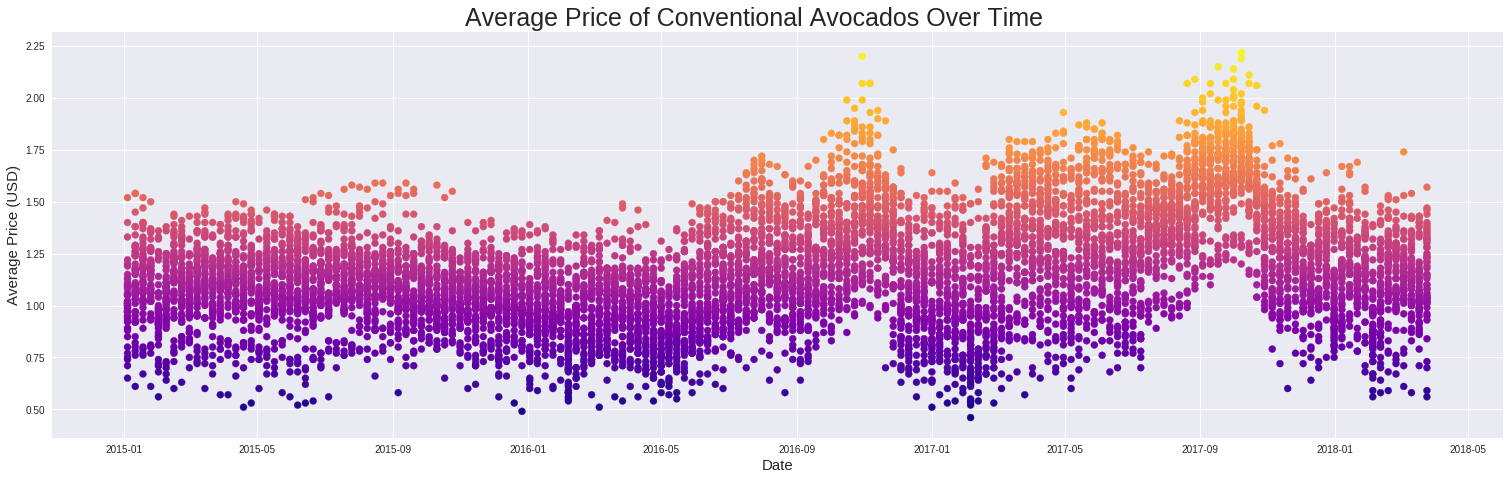

In [31]:
# Average price of Conventional Avocados over time

mask = df['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

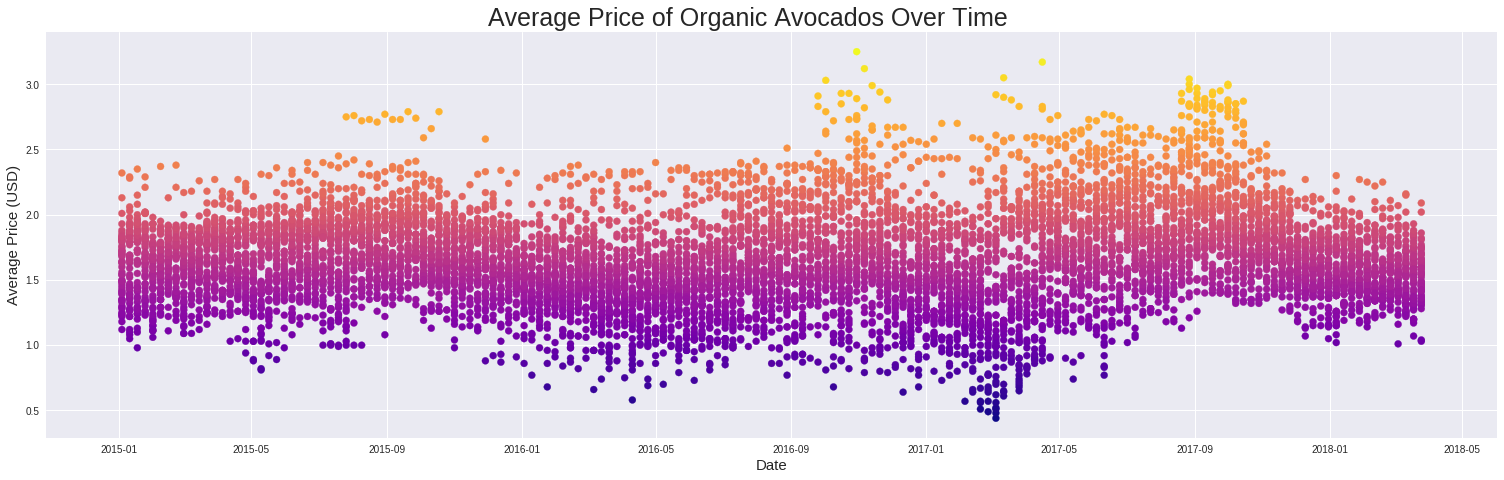

In [32]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

In [33]:
# TIME SERIES ANALYSIS

# Since the data itself is a time series data, I first want to see time series analysis predictions, and then apply ML models.

# Creating a two-column dataset to use in time series analysis;

df2 = df[['Date', 'AveragePrice']]
df2 = df2.set_index('Date')

weekly_df = df2.resample('W').mean()
w_df = weekly_df.reset_index().dropna()

w_df.sort_values(by=['Date'])
w_df.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


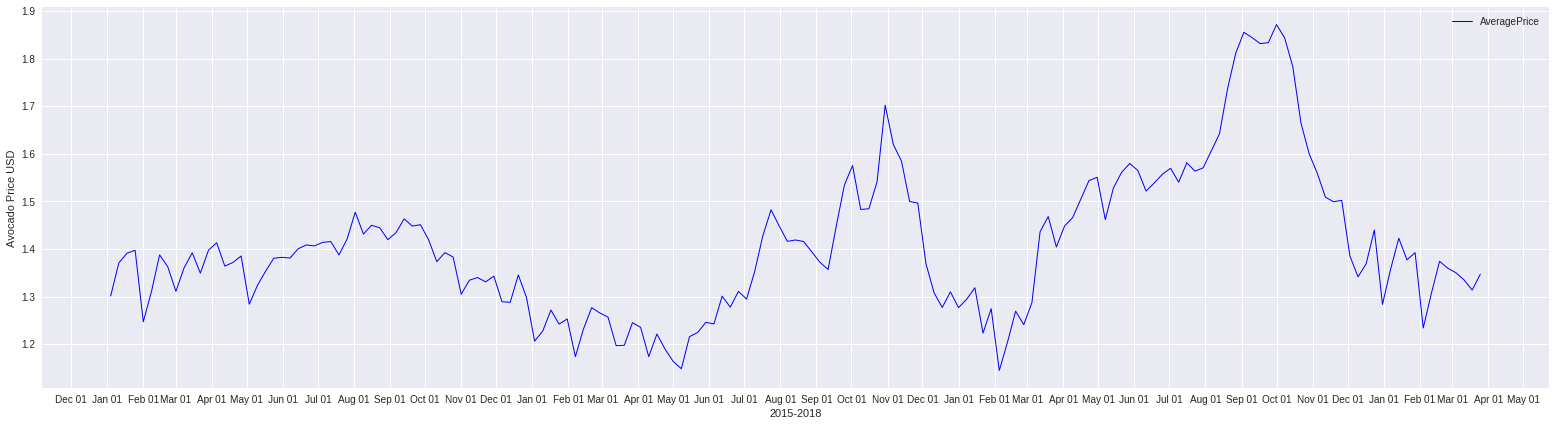

In [34]:
# Plotting the weekly average prices by month;

import matplotlib.dates as mdates


fig = plt.figure(figsize = (27, 7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(w_df['Date'],w_df['AveragePrice'],color='b', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Avocado Price USD")
plt.legend()
plt.show()

In [0]:
# The season;

# The growing season in California is from February to September with a peak during the summer months, whereas In Mexico, avocados are grown and harvested almost all year long.

# We see an increase in avocado prices during the months when the harvest is less abundant (e.g., spring, fall, and winter). ---> Seasonality

# Excessive heat;

# In 2016, a massive heat wave — which affected both California and Mexico — contributed to the high cost of avocados in 2017.

# Heavy rains;

# In recent years, California has seen some heavy rainfall during the winter months, which has ultimately affected the price of avocados.

# Fire;

# California wildfires might have caused permanent vascular damage to some of the trees. (California wildfires/ 2017)

# Trade

# Imposing tariffs on imported avocados would not only raise the product price for suppliers, but it would also increase the cost for consumers too.

# Supply and demand

# USA consumption of avocados has been increasing significantly over the years --> from 2 pounds to a record 7 pounds per capita between 2000 and 2016 (Statista, 2018)

# In 2017, weak harvest (projected to be down 44% compared with 2016, according to the California Avocado Commissionand) and huge demand for avocados, caused the peaks.

In [36]:
# Time Series Forecasts using Facebook's Prophet()

w_df.columns = ['ds', 'y']

#!pip3 uninstall --yes fbprophet
#!pip3 install fbprophet --no-cache-dir --no-binary :all:

from fbprophet import Prophet

P=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False, changepoint_range=1) 
#interval_width sets the uncertainty interval to produce a confidence interval around the forecast

P.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)


P.fit(w_df)

future = P.make_future_dataframe(freq='W', periods=4)  # Let's predict the next month's average prices

future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
168,2018-03-25
169,2018-04-01
170,2018-04-08
171,2018-04-15
172,2018-04-22


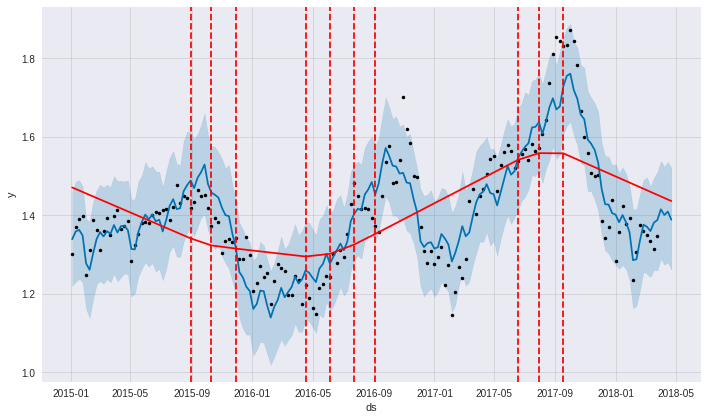

In [37]:
from fbprophet.plot import add_changepoints_to_plot

forecast = P.predict(future)
fig = P.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), P, forecast)

In [38]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
168,2018-03-25,1.387964,1.259555,1.510438
169,2018-04-01,1.415136,1.289227,1.538468
170,2018-04-08,1.400699,1.274122,1.523636
171,2018-04-15,1.409338,1.280472,1.536096
172,2018-04-22,1.388708,1.261678,1.521461


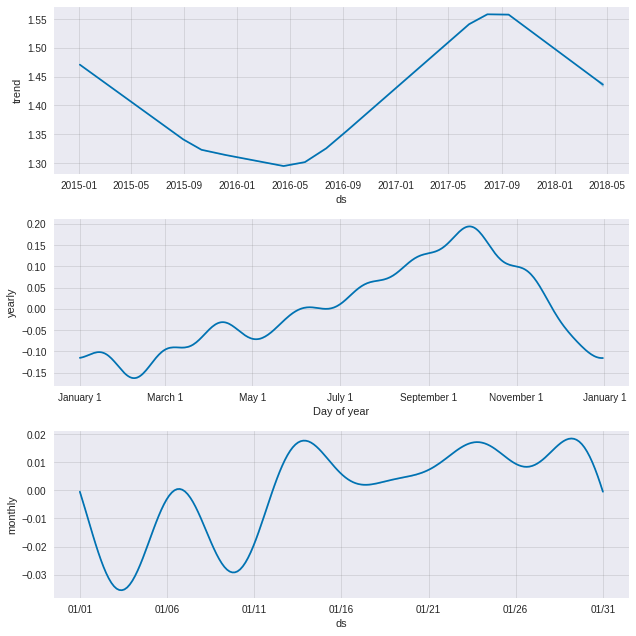

In [39]:
fig2 = P.plot_components(forecast)

In [40]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(P, initial = '365 days', period = '30 days', horizon = '30 days')

df_cv.tail()

INFO:fbprophet:Making 27 forecasts with cutoffs between 2016-01-05 00:00:00 and 2018-02-23 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
111,2018-02-25,1.418797,1.294526,1.549670,1.359630,2018-02-23
112,2018-03-04,1.425050,1.300763,1.554964,1.350185,2018-02-23
113,2018-03-11,1.424319,1.299990,1.549843,1.335093,2018-02-23
114,2018-03-18,1.451590,1.318670,1.579595,1.313704,2018-02-23
115,2018-03-25,1.453713,1.335549,1.586869,1.346852,2018-02-23


In [42]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()


,horizon,mse,rmse,mae,mape,coverage
12,29 days,0.018830,0.137223,0.114481,0.077439,0.363636
85,30 days,0.022063,0.148537,0.128978,0.084556,0.272727
25,30 days,0.023173,0.152227,0.137465,0.091332,0.181818
55,30 days,0.027285,0.165181,0.154500,0.104983,0.090909
115,30 days,0.026628,0.163182,0.151803,0.103183,0.181818


In [43]:
np.mean(df_p['mape'])

0.07699659244947255

In [44]:
np.mean(df_p['rmse'])

0.13219350778409603

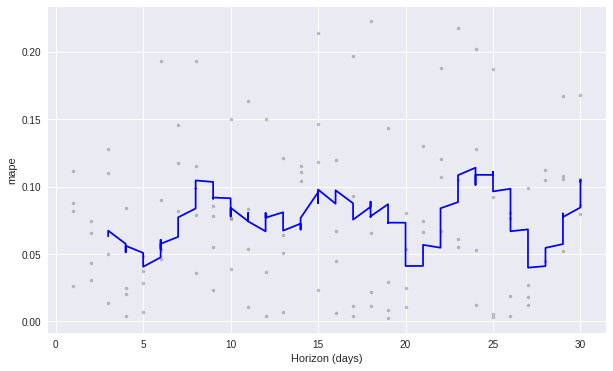

In [45]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
# mean absolute percentage error MAPE  

In [46]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

forecastedvalues

# Predictions for the next month are as follows;

,ds,yhat
168,2018-03-25,1.387964
169,2018-04-01,1.415136
170,2018-04-08,1.400699
171,2018-04-15,1.409338
172,2018-04-22,1.388708


In [0]:
# We already know that y=1.347 for 2018-03-25, and the model prediction is 1.388, which is actually over 3% of the real value.

Red = Predicted Values, Blue = Base Values


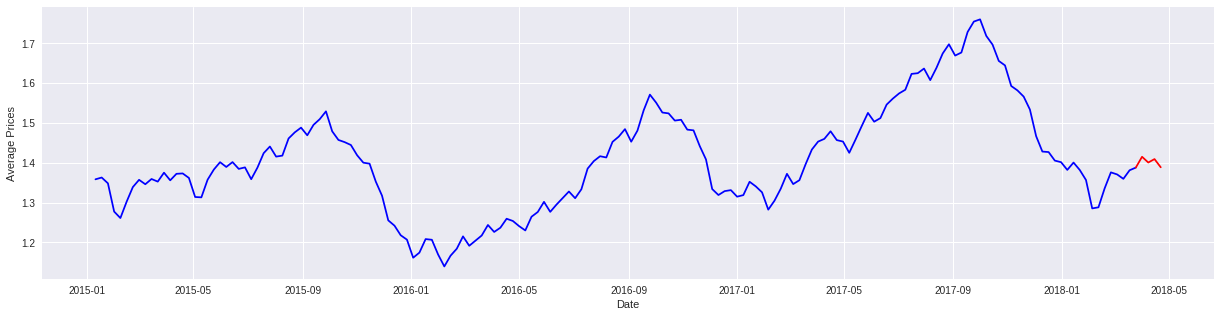

In [47]:
fig, ax1 = plt.subplots(figsize=(21, 5))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

In [0]:
# With Facebook Prophet() we obtain forecasts which are off by 8% due to MAPE values. (Accuracy= 92%)

# The Prophet predicts future prices in a downward trend.

In [0]:
# Now, Let's see what we get from Machine Learning Algorithms!

In [0]:
# Dropping the Date column (date format is not suitable for next level analysis (i.e. OHE))
df = df.drop(['Date'], axis = 1)

In [51]:
# Checking if the sample is biased;
df.groupby('region').size() # Approximately, there are 338 observations from each region, sample seems unbiased

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [52]:
len(df.region.unique())

54

In [53]:
df.region.unique() # There are 54 regions but some are subsets of the other regions, i.e: San Francisco-California

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [54]:
# basically we can remove states and work on cities rather than analysing both (to prevent multicollinerarity)

regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(regionsToRemove)]
len(df.region.unique())

43

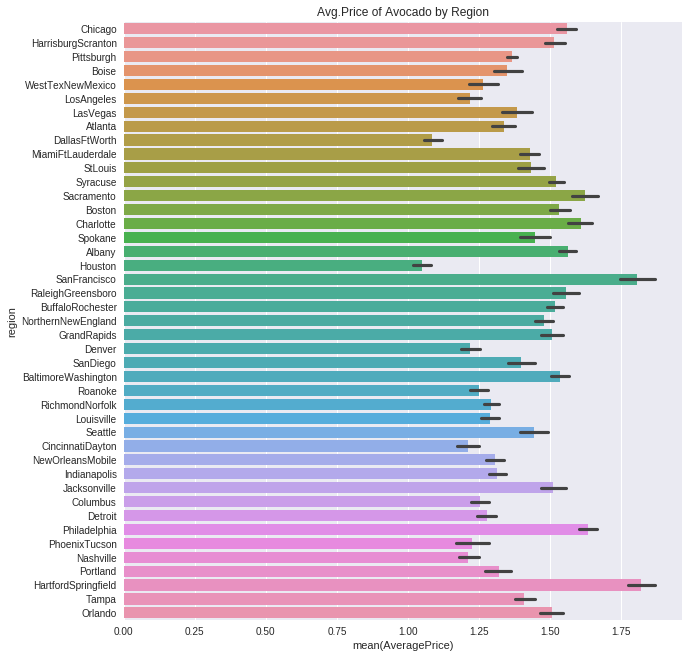

In [55]:
# The average prices by regions

plt.figure(figsize=(10,11))
plt.title("Avg.Price of Avocado by Region")
Av= sns.barplot(x="AveragePrice",y="region",data= df)

In [56]:
type_counts = df.groupby('type').size()
print(type_counts) 

# Types of avocados are also unbiased since the ratio is almost 0.5

type
conventional    7267
organic         7264
dtype: int64


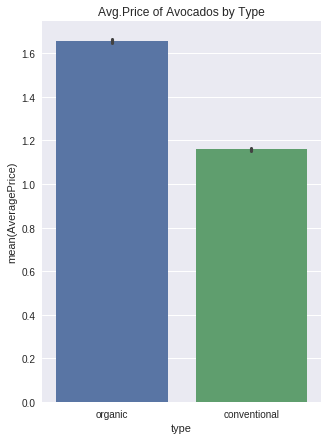

In [57]:
# The average prices of avocados by types; organic or not

plt.figure(figsize=(5,7))
plt.title("Avg.Price of Avocados by Type")
Av= sns.barplot(x="type",y="AveragePrice",data= df)

In [58]:
# Total Bags = Small Bags + Large Bags + XLarge Bags

# To avoid multicollinearity I'll keep S-L-XL bags and drop Total Bags

# But before droping I'd better to see the correlation between those columns:

df[['Small Hass', "Large Hass", "XLarge Hass",'Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
Small Hass,1.000000,0.505321,0.412247,0.653724,0.348216,0.454440,0.890380,0.684041
Large Hass,0.505321,1.000000,0.580107,0.563730,0.265454,0.308823,0.787495,0.577115
XLarge Hass,0.412247,0.580107,1.000000,0.437290,0.121320,0.492822,0.576676,0.429245
Small Bags,0.653724,0.563730,0.437290,1.000000,0.238270,0.658700,0.836906,0.956905
Large Bags,0.348216,0.265454,0.121320,0.238270,1.000000,0.080479,0.429051,0.509324
XLarge Bags,0.454440,0.308823,0.492822,0.658700,0.080479,1.000000,0.549505,0.622964
Total Volume,0.890380,0.787495,0.576676,0.836906,0.429051,0.549505,1.000000,0.869796
Total Bags,0.684041,0.577115,0.429245,0.956905,0.509324,0.622964,0.869796,1.000000


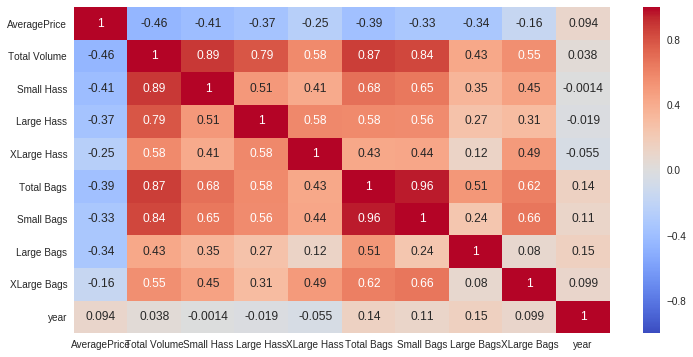

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# darker = stronger

In [0]:
# There is a high correlation between those pairs: 
# small hass & total volume  (0.89)      
# total bags & total volume  (0.87)      
# small bags & total bags    (0.96)      

# Small Hass avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.
# Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.
# Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

In [61]:
df_V = df.drop(['AveragePrice', 'Total Volume', 'Total Bags'], axis = 1).groupby('year').agg('sum')
df_V

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,3.956835e+08,3.816794e+08,34551068.97,1.424565e+08,28409959.31,1324210.40
2016,3.373537e+08,3.684409e+08,37822298.99,2.630756e+08,80734611.45,4894984.66
2017,3.667922e+08,3.405079e+08,22968983.86,2.811956e+08,93246243.70,5384099.35
2018,1.013592e+08,8.963867e+07,5804442.33,7.920550e+07,28310113.38,1589371.50


Text(0, 0.5, '')

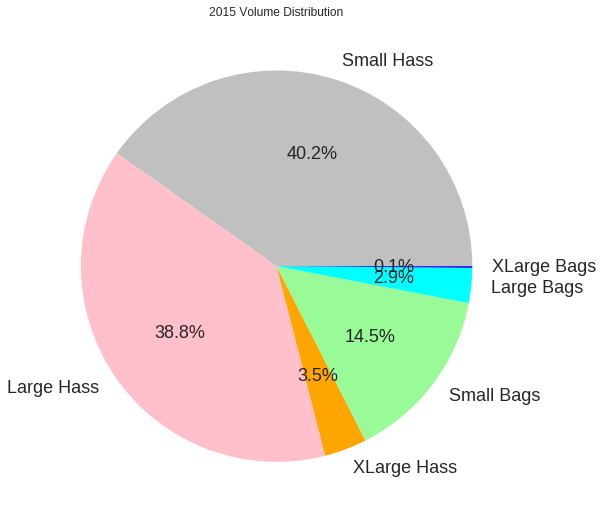

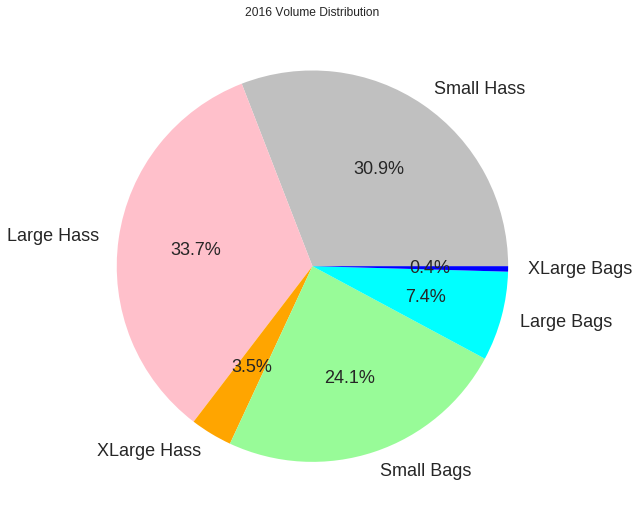

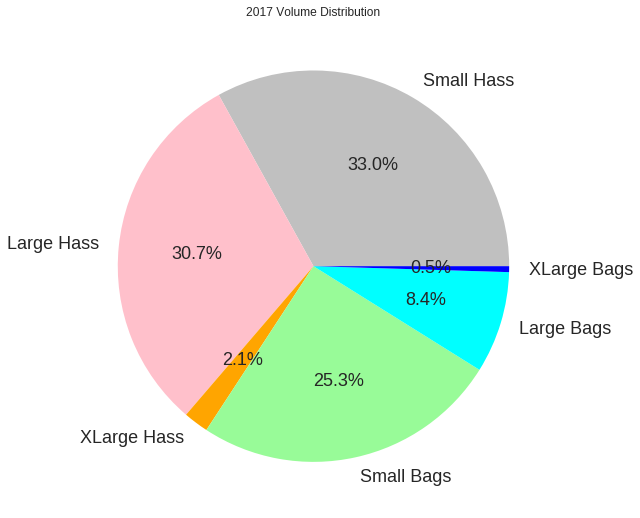

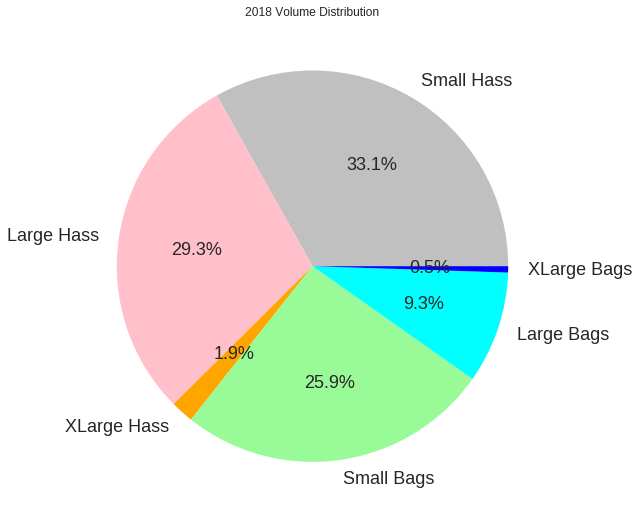

In [62]:
indexes = ['Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags']
series = pd.DataFrame({'2015': df_V.loc[[2015],:].values.tolist()[0],
                      '2016': df_V.loc[[2016],:].values.tolist()[0],
                      '2017': df_V.loc[[2017],:].values.tolist()[0],
                      '2018': df_V.loc[[2018],:].values.tolist()[0]}, index=indexes)
series.plot.pie(y='2015',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2015 Volume Distribution').set_ylabel('')
series.plot.pie(y='2016',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2016 Volume Distribution').set_ylabel('')
series.plot.pie(y='2017',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2017 Volume Distribution').set_ylabel('')
series.plot.pie(y='2018',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2018 Volume Distribution').set_ylabel('')

In [0]:
# Total Bags = Small Bags + Large Bags + XLarge Bags

df = df.drop(['Total Bags'], axis = 1)

In [0]:
# Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags , to avoid multicollinearity I also drop Total Volume column.


df = df.drop(['Total Volume'], axis = 1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14531 entries, 9593 to 8574
Data columns (total 10 columns):
AveragePrice    14531 non-null float64
Small Hass      14531 non-null float64
Large Hass      14531 non-null float64
XLarge Hass     14531 non-null float64
Small Bags      14531 non-null float64
Large Bags      14531 non-null float64
XLarge Bags     14531 non-null float64
type            14531 non-null object
year            14531 non-null int64
region          14531 non-null object
dtypes: float64(7), int64(1), object(2)
memory usage: 1.8+ MB


In [66]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

              AveragePrice  Small Hass  Large Hass  XLarge Hass  Small Bags  Large Bags  \
AveragePrice         1.000      -0.412      -0.365       -0.253      -0.329      -0.335   
Small Hass          -0.412       1.000       0.505        0.412       0.654       0.348   
Large Hass          -0.365       0.505       1.000        0.580       0.564       0.265   
XLarge Hass         -0.253       0.412       0.580        1.000       0.437       0.121   
Small Bags          -0.329       0.654       0.564        0.437       1.000       0.238   
Large Bags          -0.335       0.348       0.265        0.121       0.238       1.000   
XLarge Bags         -0.158       0.454       0.309        0.493       0.659       0.080   
year                 0.094      -0.001      -0.019       -0.055       0.109       0.150   

              XLarge Bags   year  
AveragePrice       -0.158  0.094  
Small Hass          0.454 -0.001  
Large Hass          0.309 -0.019  
XLarge Hass         0.493 -0.055  
Small

In [67]:
# Standardizing (scaling) the variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(df.loc[:,'Small Hass':'XLarge Bags']) 
df.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231,organic,2015,Chicago
10009,1.68,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231,organic,2015,HarrisburgScranton
1819,1.52,-0.394,-0.331,-0.269,-0.336,-0.286,-0.231,conventional,2015,Pittsburgh
9333,1.64,-0.408,-0.580,-0.347,-0.426,-0.367,-0.231,organic,2015,Boise
2807,0.75,1.701,0.483,0.414,0.912,-0.306,-0.231,conventional,2015,WestTexNewMexico


In [0]:
# Specifying dependent and independent variables

X = df.drop(['AveragePrice'], axis = 1)
y = df['AveragePrice']
y=np.log1p(y)

In [0]:
# Labeling the categorical variables

Xcat=pd.get_dummies(X[["type","region"]], drop_first = True)

In [0]:
Xnum=X[["Small Hass","Large Hass","XLarge Hass","Small Bags","Large Bags","XLarge Bags"]]

In [81]:
F_DF = pd.concat([y,X,Xcat],axis=1)
F_DF.head(2)

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico
9593,0.912,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231,organic,2015,Chicago,...,0,0,0,0,0,0,0,0,0,0
10009,0.986,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231,organic,2015,HarrisburgScranton,...,0,0,0,0,0,0,0,0,0,0


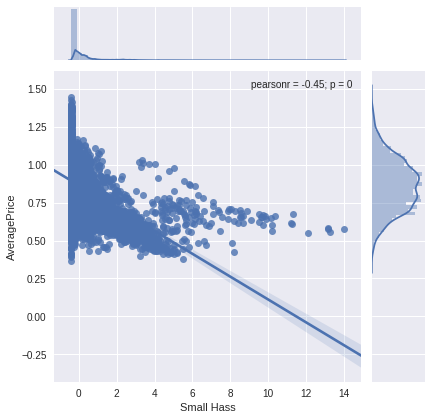

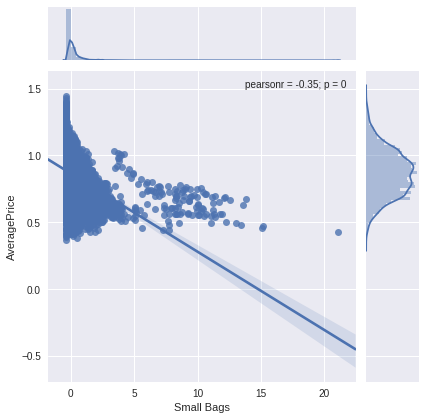

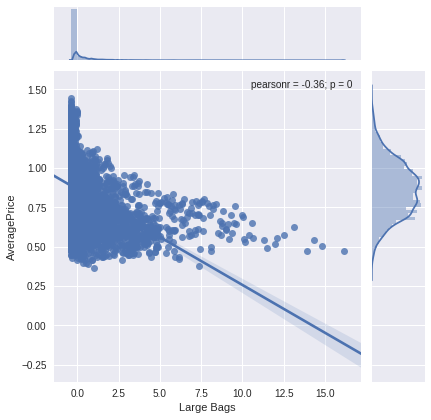

In [82]:
# Just before the regression analysis, I want to visualise the highly correlated Variables with the Average Prices;

import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="AveragePrice", data=F_DF, kind="reg");
sns.jointplot(x="Small Bags", y="AveragePrice", data=F_DF, kind="reg");
sns.jointplot(x="Large Bags", y="AveragePrice", data=F_DF, kind="reg");

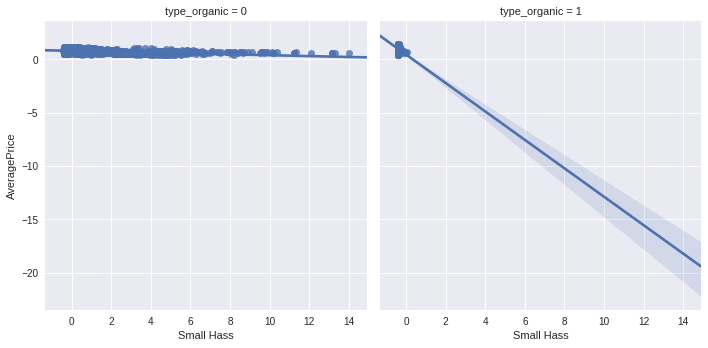

In [83]:
sns.lmplot(x="Small Hass", y="AveragePrice", col="type_organic", data=F_DF, col_wrap=2);
#sns.lmplot(x="Small Hass", y="AveragePrice", col="type", data=F_DF, col_wrap=2);

# Graphs depict that organic avocados have less elasticity to the price, compared to conventional ones.

In [0]:
# TRAIN and TEST SPLIT

# Since the data is a time series data (gives weekly avocado prices between Jan 2015 and Apr 2018)
# I sort it by Date and then split it due to date manually (not randomly), to preserve the 'times series effect' on it.
# I determined the split ratio as 0.30, so train and test data are just as follows;


#X_train=X[0:10172]
#y_train=y[0:10172]
#X_test=X[10172:]
#y_test=y[10172:]

X_train=Xcat[0:10172]
y_train=y[0:10172]
X_test=Xcat[10172:]
y_test=y[10172:]

In [0]:
# Implementing machine learning models


In [0]:
# Multiple Linear Regression 

In [89]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

print ("R2 of Linear Regresson:", LinReg.score(X_train,y_train) )

R2 of Linear Regresson: 0.6256438178738355


In [90]:
print('MAE: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE:  0.11690752029210107
MSE:  0.02177987469450668
RMSE: 0.1475800619816467


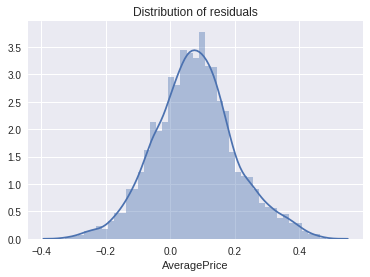

In [91]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - LinReg.predict(X_test))
plt.title('Distribution of residuals');

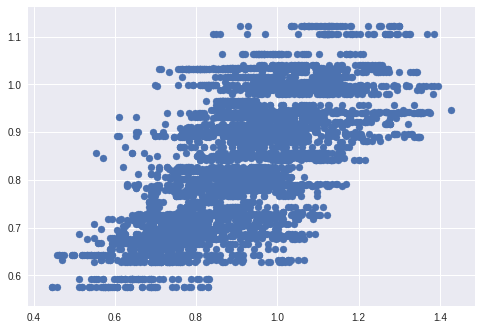

In [92]:
plt.scatter(y_test,LinReg.predict(X_test))

In [93]:
# we can confirm the R2 value (moreover, get the R2 Adj.value) of the model by statsmodels library of python
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # adding a constant
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     393.6
Date:                Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                        07:24:49   Log-Likelihood:                 8845.8
No. Observations:               10172   AIC:                        -1.760e+04
Df Residuals:                   10128   BIC:                        -1.729e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [0]:
#X_train=X[0:10172]
#y_train=y[0:10172]
#X_test=X[10172:]
#y_test=y[10172:]

X_train=Xcat[0:10172]
y_train=y[0:10172]
X_test=Xcat[10172:]
y_test=y[10172:]

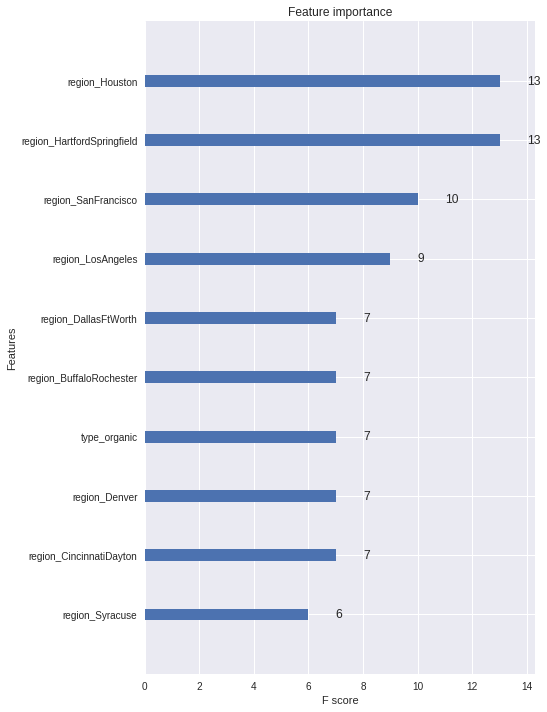

In [97]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(X_train, y_train)
dtest=xgb.DMatrix(X_test, y_test)
model = xgb.train(xgb_params,dtrain)

# plot the important features #
fig, ax = plt.subplots(figsize=(7,12))
xgb.plot_importance(model, max_num_features=10, height=0.2, ax=ax)   # max.imp.10 features. You can tune by max_num_features
plt.show()

In [98]:
# LASSO and RIDGE Regressions

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-5,3,20)

clf = GridSearchCV(estimator=linear_model.Ridge(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_R = clf.best_estimator_.alpha
print('Optimum regularization parameter (Ridge):', optlamGSCV_R)

clf = GridSearchCV(estimator=linear_model.Lasso(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_L= clf.best_estimator_.alpha
print('Optimum regularization parameter (Lasso):', optlamGSCV_L)

Optimum regularization parameter (Ridge): 0.4281332398719396
Optimum regularization parameter (Lasso): 1e-05


In [99]:
ridge = linear_model.Ridge(alpha = optlamGSCV_R) 
ridge.fit(X_train, y_train)
print('RMSE value of the Ridge Model is: ',np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))))

RMSE value of the Ridge Model is:  0.14750040776496223


In [100]:
ridge.score(X_train, y_train) #Returns the coefficient of determination (R2) of the prediction.

0.6256088643936295

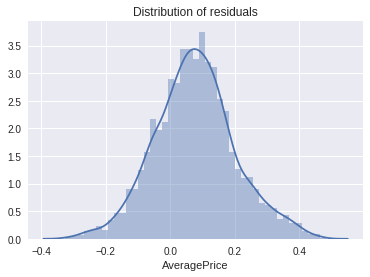

In [101]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - ridge.predict(X_test))
plt.title('Distribution of residuals');

In [102]:
lasso = linear_model.Lasso(alpha = optlamGSCV_L)
lasso.fit(X_train, y_train)
print('RMSE value of the Lasso Model is: ',np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))

RMSE value of the Lasso Model is:  0.1474224880878307


In [103]:
lasso.score(X_train, y_train) #Returns the coefficient of determination R^2 of the prediction.

0.6255103356353254

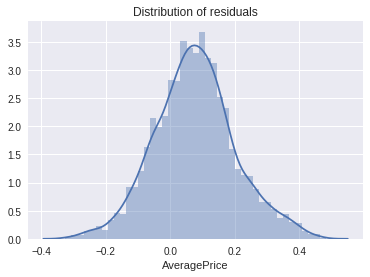

In [104]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - lasso.predict(X_test))
plt.title('Distribution of residuals');

Lasso picked 43 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

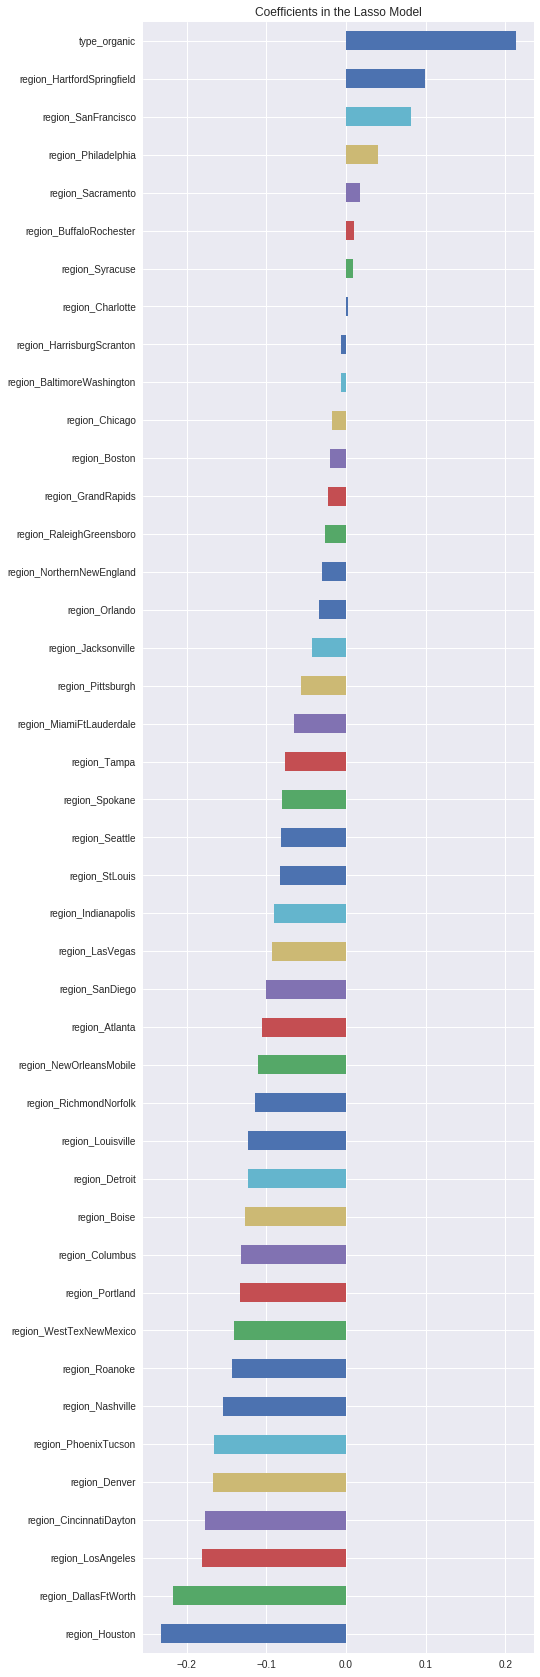

In [105]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values()]) #plot all
matplotlib.rcParams['figure.figsize'] = (7.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [106]:
# To sum up:

# Linear Regression RMSE : 
print('RMSE value of the Linear Regr is: ',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))
# Ridge RMSE             : 
print('RMSE value of the Ridge Model is: ',np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))))
# Lasso RMSE             : 
print('RMSE value of the Lasso Model is: ',np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test)))) 

RMSE value of the Linear Regr is:  0.1475800619816467
RMSE value of the Ridge Model is:  0.14750040776496223
RMSE value of the Lasso Model is:  0.1474224880878307


In [0]:
# According to the RMSE results, Not  Ridge But Lasso works best compared to linear regression and lasso.

# Let's see the other ML Models' RMSE values;

In [0]:
# KNN Regressor

In [109]:
from sklearn import neighbors
from math import sqrt

Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
error = sqrt(metrics.mean_squared_error( y_test, Knn.predict(X_test))) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 0.15019012794367737


In [110]:
Knn.score(X_train, y_train)  # R2 of the KNN model

0.6139143148818376

In [0]:
# SVR Regressor

In [112]:
from sklearn.svm import SVR

# First, let's choose which kernel is the best for our data

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

linear 0.6231256344693863
poly 0.12025902736529936
rbf 0.6479750569129494
sigmoid 0.6200165545909555


In [113]:
Svr=SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

# Intuitively, the gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
# The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
# For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
# A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
# In other words C behaves as a regularization parameter in the SVM.

Svr.fit(X_train,y_train)
print(Svr.score(X_train,y_train))

0.6654944624073587


In [114]:
error = sqrt(metrics.mean_squared_error(y_test,Svr.predict(X_test))) #calculate rmse
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.14301321801502534


In [115]:
Svr.predict(X_test)[0:5]  # print the first 5 predictions of our test set

array([0.89785789, 0.91154282, 0.86332548, 1.00219746, 1.14709017])

In [116]:
y_test[0:5]

16687    0.784
14938    0.779
16157    0.928
15521    1.099
15680    1.281
Name: AveragePrice, dtype: float64

In [0]:
# Decision Tree Regressor

In [118]:
# Determining the best depth
from sklearn.tree import DecisionTreeRegressor

minDepth = 100
minRMSE = 100000


for depth in range(2,10):
  tree_reg = DecisionTreeRegressor(max_depth=depth)
  tree_reg.fit(X_train, y_train)
  y_pred = tree_reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print("Depth:",depth,", MSE:", mse)
  print("Depth:",depth, ",RMSE:", rmse)
  
  if rmse < minRMSE:
    minRMSE = rmse
    minDepth = depth
    
      
print("MinDepth:", minDepth)
print("MinRMSE:", minRMSE)

Depth: 2 , MSE: 0.023172610572412947
Depth: 2 ,RMSE: 0.15222552536422052
Depth: 3 , MSE: 0.022429728359630103
Depth: 3 ,RMSE: 0.14976557801988447
Depth: 4 , MSE: 0.021935082068196044
Depth: 4 ,RMSE: 0.14810496976197673
Depth: 5 , MSE: 0.021631012010134287
Depth: 5 ,RMSE: 0.147074851725692
Depth: 6 , MSE: 0.021498295643399962
Depth: 6 ,RMSE: 0.14662297106319994
Depth: 7 , MSE: 0.021728187718149546
Depth: 7 ,RMSE: 0.14740484292637587
Depth: 8 , MSE: 0.021852389196894584
Depth: 8 ,RMSE: 0.14782553634908477
Depth: 9 , MSE: 0.021739730971615013
Depth: 9 ,RMSE: 0.14744399266031497
MinDepth: 6
MinRMSE: 0.14662297106319994


In [119]:
DTree=DecisionTreeRegressor(max_depth=minDepth)
DTree.fit(X_train,y_train)
print(DTree.score(X_train,y_train))  

0.5427288486168979


In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, DTree.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, DTree.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))))

MAE: 0.1160255316761903
MSE: 0.021498295643400327
RMSE: 0.14662297106320116


In [121]:
#!pip3 install pydotplus --no-cache-dir --no-binary :all:
        
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTree, out_file=dot_data, feature_names = X.columns, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# We obtain a 2 depth figure :)

ValueError: ignored

In [122]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)
print(RForest.score(X_train,y_train))  

0.672567925415738


In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.11363652823878712
MSE: 0.020900318508912632
RMSE: 0.1445694245299214


In [0]:
# CONCLUSION 

# Comparing The RMSE Values Of The Models

In [125]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regr : ',round(np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))),4))

# Ridge RMSE             : 
print('RMSE value of the Ridge Model : ',round(np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))),4))

# Lasso RMSE             : 
print('RMSE value of the Lasso Model : ',round(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))),4))

# KNN RMSE               : 
print('RMSE value of the KNN Model   : ',round(np.sqrt(metrics.mean_squared_error(y_test, Knn.predict(X_test))),4))

# SVR RMSE               : 
print('RMSE value of the SVR Model   : ',round(np.sqrt(metrics.mean_squared_error(y_test, Svr.predict(X_test))),4))

# Decision Tree RMSE     : 
print('RMSE value of the Decis Tree  : ',round(np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))),4))

# Random Forest RMSE     : 
print('RMSE value of the Rnd Forest  : ',round(np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))),4))

# Times Series RMSE      : 
print('RMSE value of the TS Analysis : ',round(np.mean(df_p['rmse']),4))

RMSE value of the Linear Regr :  0.1476
RMSE value of the Ridge Model :  0.1475
RMSE value of the Lasso Model :  0.1474
RMSE value of the KNN Model   :  0.1502
RMSE value of the SVR Model   :  0.143
RMSE value of the Decis Tree  :  0.1466
RMSE value of the Rnd Forest  :  0.1446
RMSE value of the TS Analysis :  0.1322


In [0]:
# Now, it's time to decide wheather you're interested in short term predictions or long term!

# When we analyse the results, due to the RMSE values, we see that:

# If we need to get short period estimates, we'd better to use Time Series Analysis for this dataset. (MAPE= 8% and Accuracy= 92%)

# But, if we need longer periods prices, SVR model gives the best predicts. (coefficient of determination of 82%)

# Enjoy Machine Learning!